# 분류 분석

## 이진 고객 이탈

- 쓸 수 있는 가짓수가 많음 
- logi가능, 분류
- 머신러닝 엔지니어로써 실무적으로 가장 많이 사용하는 문제

고객의 웹사이트 광고를 제공하는 마케팅 대행사에서 당사의 고객이탈율이 꽤 높다는 사실을 알게됐습니다.<br>
그 회사에서는 즉시 고객 관리자들을 할당했지만(분류기준이 없음), 어떤 고객이 이탈 할 것인지 예측하는 기계학습 모델을 만들어서 가장 이탈확률이 높은 고객에게 우선적으로 고객 관리자를 배치할 수 있기를 원합니다.<br>
고객이 잠재적 이탈 고객인지 여부를 분류하는 분류모델을 만드세요.

- 어떤 고객이 이탈확률이 높은지
- 이탈 확률이 높은 고객을 우선고객으로 배치해야 한다 

데이터는 customer_churn.csv로 저장돼있습니다. 아래는 각 컬럼의 정의입니다.
- Name : 회사의 최근 담당자의 이름
- Age : 고객의 나이
- Total_Purchase : 구매한 총 광고
- Account_Manager : 바이너리 0 = 고객 관리자 없음, 1 = 고객 관리자 할당됨
- Years : 거래 유지 연도수
- Num_sites : 서비스를 이용 중인 웹사이트 수
- Onboard_date : 마지막 연락처가 등록된 날짜
- Location : 고객 사무실 주소
- Company : 고객 회사의 이름

모델 생성 후에는 고객이 제공하는 new_customers.csv 파일에 저장된 새로운 데이터에 대한 예측값을 제시하세요. <br>
고객은 이 데이터를 통해 관리가 필요한 고객들을 알고 싶어 합니다.
종속값 Churn

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

# 랜덤 포레스트랑~ 전부 앙상블 기반의 모델 
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                               GradientBoostingClassifier)
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### 데이터 불러오기

In [201]:
df = pd.read_csv('./data/customer_churn.csv')
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [202]:
df = df.drop("Names", axis = 1)
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [267]:
new_df = pd.read_csv('./data/new_customers.csv')
new_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,NaN
Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,NaN
Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,NaN
Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,NaN
Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,NaN


In [240]:
new_df.shape

(6, 9)

### 데이터 확인

In [203]:
df.shape

(900, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    int64  
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Onboard_date     900 non-null    object 
 6   Location         900 non-null    object 
 7   Company          900 non-null    object 
 8   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 63.4+ KB


In [49]:
df.isna().sum()

Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

- 결측치 없음

In [50]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [51]:
df.dtypes

Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

### 머신러닝용 데이터 전처리

우리는 수치형 데이터만 이용할 예정입니다. Account_Manager는 다루기 어렵지 않기 때문에 모델학습에 포함할 수도 있겠지만 무작위로 할당된 것이기 때문에 큰 의미가 없을 수 있습니다.(분류기준이 없음)

#### 3. 교차검증(ccross_validate) 사용하기

- 정확도 90%는 의미가 없다.
- 1. 교차검증으로 **AVC** 를 계산하여라 (AVC 계산식) 공식홈페이지에 있음
- 2. 해당 모델로 **new customer 예측값**을 보내드리기 

In [53]:
df['Total_Purchase'].unique()

array([11066.8 , 11916.22, 12884.75,  8010.76,  9191.58, 10356.02,
       11331.58,  9885.12, 14062.6 ,  8066.94, 11575.37,  8771.02,
        8988.67,  8283.32,  6569.87, 10494.82,  8213.41, 11226.88,
        5515.09,  8046.4 ,  9771.22, 12217.95,  9381.12, 10474.94,
       11158.5 ,  8207.1 , 12403.81, 10041.13, 12721.55,  8284.89,
       10661.48, 10793.11,  9322.44,  9814.22, 11740.  , 14383.36,
       11887.39, 10367.08,  8198.06,  7777.37, 11699.26, 16838.94,
       10484.33,  8736.06, 10850.78,  8601.01, 11170.06, 11185.62,
        9793.42, 12524.68, 12682.9 , 14036.28, 10179.92, 12772.72,
       12122.19,  9922.3 ,  4771.65, 10827.96,  8642.01,  6749.49,
        6447.99, 11091.21,  5024.52, 12376.37, 12458.8 ,  7222.35,
       11758.69,  8772.  ,  7351.38,  7960.64, 13365.66,  8617.98,
       11849.13, 11145.95,  9577.42, 10110.4 ,  8024.08,  8563.24,
        9403.58, 12520.53, 13655.59, 12680.46,  8429.65, 11424.  ,
       13725.55,  7396.1 ,  8100.43, 10400.88,  8625.96,  5192

In [54]:
df['Account_Manager'].nunique()

2

In [55]:
df['Account_Manager'].unique()

array([0, 1], dtype=int64)

In [56]:
# 대상 변수 분포 확인 
# 이탈 고객에 비해 활성고객의 비율이 높아, 데이터 균형이 맞지 않음 
df['Churn'].value_counts()

Churn
0    750
1    150
Name: count, dtype: int64

In [72]:
len(df['Company'])

900

In [57]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


C:\Users\ITSC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


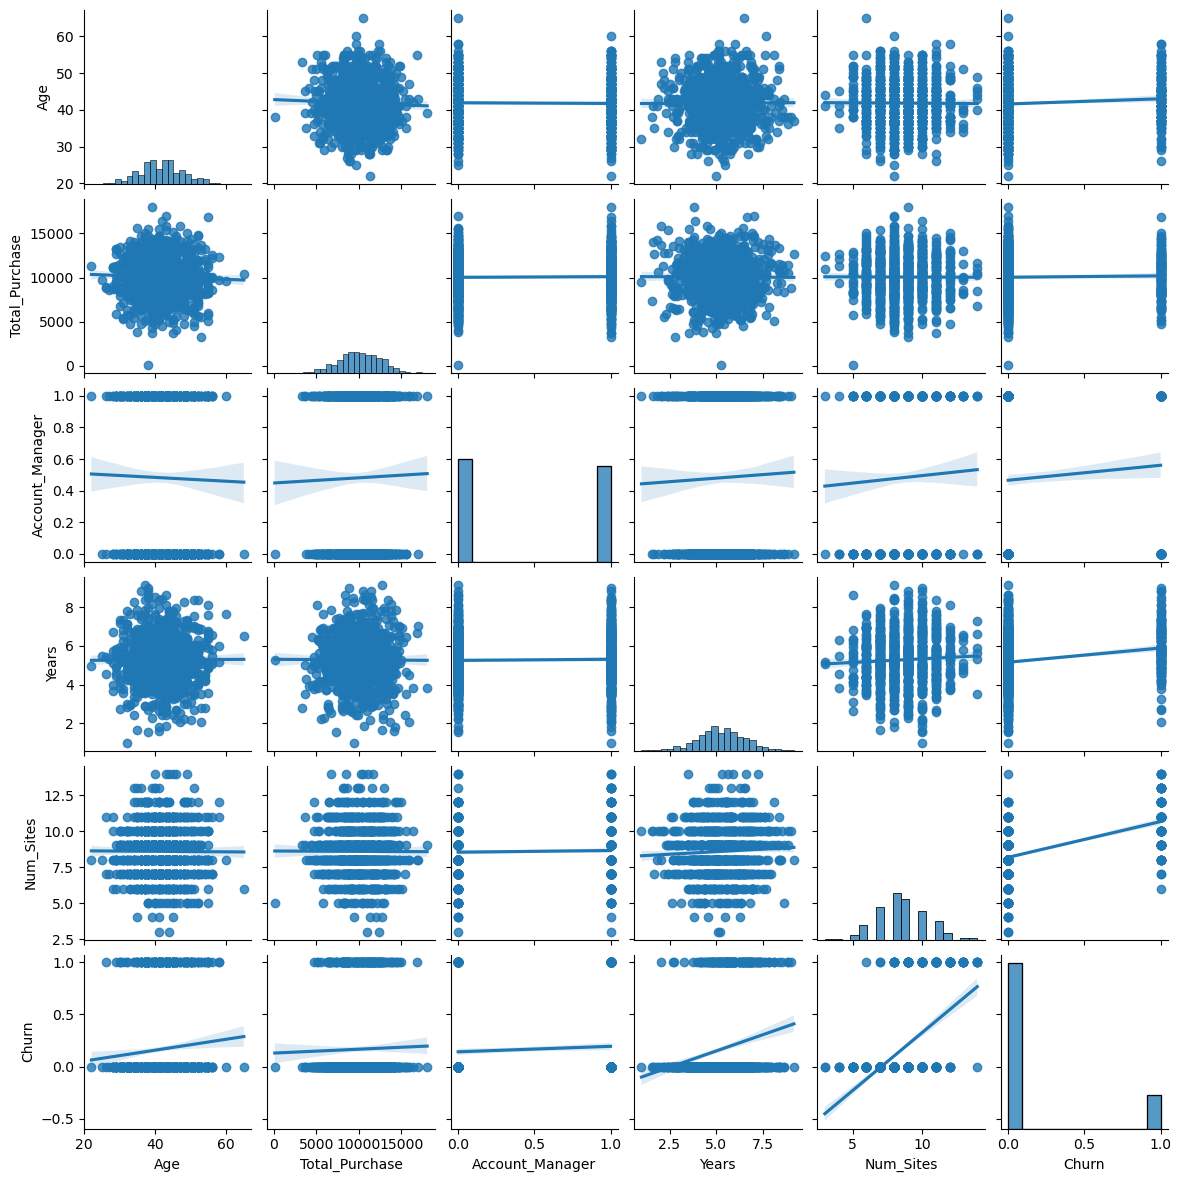

In [58]:
sns.pairplot(df, kind='reg', height = 2)

In [59]:
df.corr(numeric_only=True)

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


In [66]:
df['Total_Purchase']

0      11066.80
1      11916.22
2      12884.75
3       8010.76
4       9191.58
         ...   
895    12800.82
896     9893.92
897    12056.18
898     6517.93
899     9315.60
Name: Total_Purchase, Length: 900, dtype: float64

In [204]:
df.columns

Index(['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites',
       'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [205]:
# 숫자가 아닌 컬럼들
notnum =  [col for col in df.columns if df[col].dtype == "object"]

notnum

['Onboard_date', 'Location', 'Company']

In [206]:
# 숫자인 컬럼들
num = [col for col in df.columns if df[col].dtype != "object"]
num

['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn']

In [207]:
df['Account_Manager'].value_counts()

Account_Manager
0    467
1    433
Name: count, dtype: int64

In [208]:
df.iloc[:, 8] == 1

0       True
1       True
2       True
3       True
4       True
       ...  
895    False
896    False
897    False
898    False
899    False
Name: Churn, Length: 900, dtype: bool

In [209]:
# 1 무이탈 
not_churn1 = df.loc[df["Churn"]==1]

In [210]:
# 0 이탈 
churn0 = df.loc[df["Churn"]==0]

In [211]:
churn0

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
150,35.0,15571.26,0,6.45,9.0,2011-12-02 20:13:49,"5728 Michael Rue Riosland, NY 38804-1415",Petty and Sons,0
151,39.0,10268.87,1,3.68,6.0,2009-08-19 18:52:21,"3324 Gomez Knolls Suite 591 Farmerchester, LA ...",Brown-Wagner,0
152,44.0,12328.03,1,4.60,9.0,2006-08-29 02:24:37,"9436 Warner Mill Suite 265 Port Kenneth, OH 00...",Williams PLC,0
153,52.0,9782.83,0,3.96,7.0,2012-04-17 10:47:29,"3479 Stewart Way Sandersside, ID 69317-8759","Bishop, Tran and Pope",0
154,29.0,9378.24,0,4.93,8.0,2015-08-06 22:29:28,"8199 Christopher Tunnel Suite 537 Warnerside, ...","White, Jones and Nelson",0
...,...,...,...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [212]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [213]:
not_churn1['Total_Purchase'].value_counts().sort_values

<bound method Series.sort_values of Total_Purchase
11066.80    1
13190.30    1
8688.17     1
11434.61    1
12309.39    1
           ..
12682.90    1
14036.28    1
10179.92    1
12772.72    1
8560.76     1
Name: count, Length: 150, dtype: int64>

In [214]:
churn0['Total_Purchase'].value_counts().sort_values

<bound method Series.sort_values of Total_Purchase
15571.26    1
9672.03     1
8403.02     1
7277.27     1
8575.71     1
           ..
8418.81     1
6461.86     1
14317.20    1
4492.44     1
9315.60     1
Name: count, Length: 750, dtype: int64>

In [215]:
# 이탈하지 않은 사람들의 관리 매니저 
not_churn1['Account_Manager'].value_counts().sort_values

<bound method Series.sort_values of Account_Manager
1    84
0    66
Name: count, dtype: int64>

In [216]:
# 이탈한 사람들의 

churn0['Account_Manager'].value_counts().sort_values

<bound method Series.sort_values of Account_Manager
0    401
1    349
Name: count, dtype: int64>

In [217]:
not_churn1['Total_Purchase'].describe()

count      150.000000
mean     10192.179933
std       2283.594792
min       4771.650000
25%       8572.682500
50%      10273.760000
75%      11754.017500
max      16838.940000
Name: Total_Purchase, dtype: float64

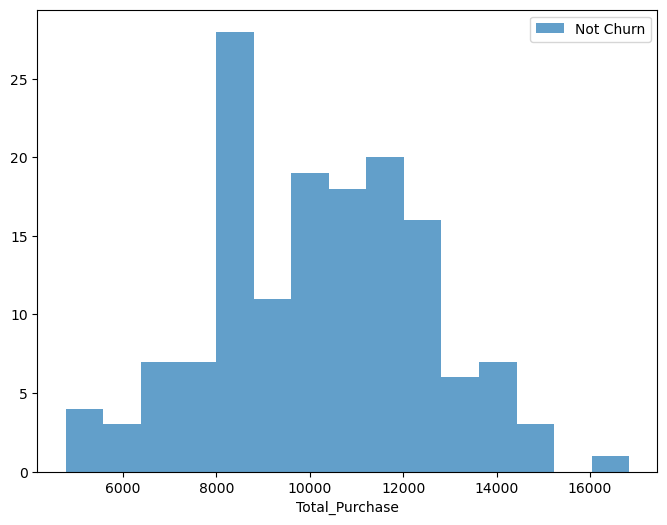

In [218]:
plt.figure(figsize=(8,6))
plt.xlabel('Total_Purchase')
plt.hist(not_churn1["Total_Purchase"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

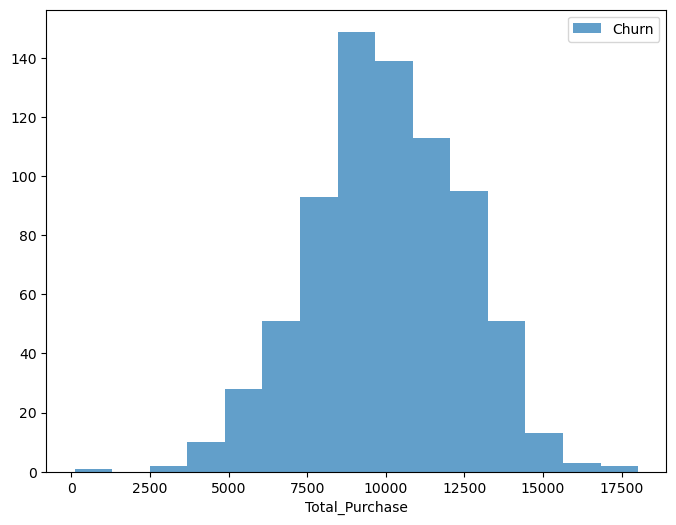

In [219]:
plt.figure(figsize=(8,6))
plt.xlabel('Total_Purchase')
plt.hist(churn0["Total_Purchase"],bins=15, alpha=0.7, label='Churn')
plt.legend(loc='upper right')
plt.show()

In [220]:
df.head(20)

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
5,48.0,10356.02,0,5.12,8.0,2009-03-03 23:13:37,"6187 Olson Mountains East Vincentborough, PR 7...",Kelly-Warren,1
6,44.0,11331.58,1,5.23,11.0,2016-12-05 03:35:43,"4846 Savannah Road West Justin, IA 87713-3460",Reynolds-Sheppard,1
7,32.0,9885.12,1,6.92,9.0,2006-03-09 14:50:20,"25271 Roy Expressway Suite 147 Brownport, FM 5...",Singh-Cole,1
8,43.0,14062.60,1,5.46,11.0,2011-09-29 05:47:23,"3725 Caroline Stravenue South Christineview, M...",Lopez PLC,1
9,40.0,8066.94,1,7.11,11.0,2006-03-28 15:42:45,"363 Sandra Lodge Suite 144 South Ann, WI 51655...",Reed-Martinez,1


In [221]:
df = df.drop(['Company', 'Location', 'Onboard_date'], axis = 1)
df

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0
896,52.0,9893.92,0,6.91,7.0,0
897,45.0,12056.18,0,5.46,4.0,0
898,51.0,6517.93,1,5.47,10.0,0


In [222]:
df.dtypes

Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Churn                int64
dtype: object

In [223]:
df['Account_Manager']

0      0
1      0
2      0
3      0
4      0
      ..
895    1
896    0
897    0
898    1
899    1
Name: Account_Manager, Length: 900, dtype: int64

In [224]:
nf = df.copy()
nf

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0
896,52.0,9893.92,0,6.91,7.0,0
897,45.0,12056.18,0,5.46,4.0,0
898,51.0,6517.93,1,5.47,10.0,0


In [227]:
nf['Account_Manager'] =nf['Account_Manager'].apply(lambda x: 1 if pd.notnull(x) else 0)

# 독립 변수와 종속 변수 선택
x = nf.drop(['Churn', 'Total_Purchase'], axis = 1)
y = nf['Churn']


In [228]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                    random_state = 11)

In [229]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 11)

In [230]:
# return_train_score : 교차 검증 시 훈련 세트에 대한 점수도 함께 변환
scores = cross_validate(rf, x_train, y_train, return_train_score = True, n_jobs = -1)

In [231]:
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

1.0 0.8833333333333334


In [232]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=11)

In [233]:
rf.feature_importances_

array([0.20048839, 0.        , 0.41876573, 0.38074588])

In [234]:
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 11)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=11)

In [235]:
rf.oob_score_

0.8708333333333333

In [236]:
rf.score(x_test, y_test)

0.8833333333333333

In [237]:
y_pred = rf.predict(x)

In [238]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [244]:
score = rf.predict_proba(x)[:, 1]
score

array([0.56, 0.93, 0.94, 0.65, 0.6 , 0.69, 0.85, 0.69, 0.87, 0.93, 0.65,
       0.71, 0.79, 0.99, 0.6 , 0.96, 0.77, 0.92, 0.65, 0.72, 0.83, 0.84,
       0.85, 0.98, 0.85, 0.74, 0.14, 0.96, 0.83, 0.7 , 0.66, 0.75, 0.82,
       0.97, 0.69, 0.79, 0.83, 0.89, 0.92, 0.93, 1.  , 0.72, 0.84, 0.98,
       0.8 , 0.55, 0.74, 0.94, 0.01, 0.51, 0.73, 0.95, 0.65, 0.64, 0.86,
       0.57, 0.78, 0.  , 0.84, 0.96, 0.85, 0.75, 0.85, 0.9 , 0.65, 0.76,
       0.97, 0.83, 0.7 , 0.71, 0.06, 0.8 , 0.88, 0.73, 0.84, 0.95, 0.54,
       0.88, 0.51, 0.94, 0.06, 0.96, 0.83, 0.53, 0.73, 0.7 , 0.99, 0.6 ,
       0.99, 0.35, 0.66, 0.95, 0.95, 0.8 , 0.77, 0.91, 0.  , 0.8 , 0.76,
       0.78, 0.7 , 0.92, 0.97, 0.78, 0.9 , 1.  , 0.66, 0.76, 0.17, 0.8 ,
       0.95, 0.63, 0.9 , 0.97, 0.23, 0.66, 0.69, 0.99, 0.83, 0.67, 0.96,
       0.71, 0.78, 0.99, 0.84, 0.59, 0.66, 0.54, 0.97, 0.9 , 0.97, 0.1 ,
       0.97, 0.69, 0.79, 0.84, 0.98, 0.8 , 0.81, 0.93, 0.93, 0.67, 0.86,
       0.91, 0.84, 0.97, 0.69, 0.98, 0.9 , 0.75, 0.

In [245]:
fpr, tpr, cut = roc_curve(y, score)

In [252]:
scores = cross_validate(rf, x_train, y_train, scoring = "roc_auc", n_jobs = -1)

In [253]:
np.mean(scores["test_score"])

0.8561805555555557

In [264]:
a = np.mean(scores["test_score"])

In [265]:
new_df.head()

,Total_Purchase,Account_Manager,Years,Num_Sites
Andrew Mccall,1,7.71,8.0,2011-08-29 18:37:54
Michele Wright,1,9.28,15.0,2013-07-22 18:19:54
Jeremy Chang,1,1.00,15.0,2006-12-11 07:48:13
Megan Ferguson,0,9.40,14.0,2016-10-28 05:32:13
Taylor Young,1,10.00,8.0,2012-03-20 00:36:46


In [268]:
new_df = new_df.drop("Names", axis = 1)
new_df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
Andrew Mccall,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd,NaN
Michele Wright,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson,NaN
Jeremy Chang,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson,NaN
Megan Ferguson,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden,NaN
Taylor Young,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC,NaN


In [269]:
new_df = new_df.iloc[:, 1:5]

In [270]:
new_df.isna().sum()

Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
dtype: int64

In [ ]:
new_df = pd.concat([new_df, pd.DataFrame()])